# IBIxTMS_2F (Ionospheric bubble index)

> Abstract: Access to the ionospheric bubble index (level 2 product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.11.6
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np

request = SwarmRequest()

## IBIxTMS_2F product information

Ionospheric bubble index at 1Hz

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#IBIxTMS_2F

### Check what "IBI" data variables are available

In [3]:
request.available_collections("IBI", details=False)

{'IBI': ['SW_OPER_IBIATMS_2F', 'SW_OPER_IBIBTMS_2F', 'SW_OPER_IBICTMS_2F']}

In [4]:
request.available_measurements("IBI")

['Bubble_Index',
 'Bubble_Probability',
 'Flags_Bubble',
 'Flags_F',
 'Flags_B',
 'Flags_q']

## Fetch 3 minutes of IBI data

In [5]:
request = SwarmRequest()
request.set_collection("SW_OPER_IBIATMS_2F")
request.set_products(measurements=request.available_measurements("IBI"))
data = request.get_between(
    dt.datetime(2016,1,1,9,7),
    dt.datetime(2016,1,1,9,10)
)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.096MB)

In [6]:
data.sources

['SW_OPER_IBIATMS_2F_20160101T000000_20160101T235959_0401']

In [7]:
df = data.as_dataframe()
df.head()

Bubble_Probability      Radius   Latitude  Flags_q  \
Timestamp                                                                 
2016-01-01 09:07:00                 0.0  6830079.64 -16.923659        5   
2016-01-01 09:07:01                 0.0  6830087.30 -16.987667        5   
2016-01-01 09:07:02                 0.0  6830094.95 -17.051675        5   
2016-01-01 09:07:03                 0.0  6830102.59 -17.115682        5   
2016-01-01 09:07:04                 0.0  6830110.23 -17.179689        5   

                     Flags_F  Flags_B  Flags_Bubble Spacecraft  Bubble_Index  \
Timestamp                                                                      
2016-01-01 09:07:00        1        0             0          A             0   
2016-01-01 09:07:01        1        0             0          A             0   
2016-01-01 09:07:02        1        0             0          A             0   
2016-01-01 09:07:03        1        0             0          A             0   
2016-01-01 09:07:04        1        0             0          A             0   

                     Longitude  
Timestamp                       
2016-01-01 09:07:00 -52.119907  
2016-01-01 09:07:01 -52.120847  
2016-01-01 09:07:02 -52.121785  
2016-01-01 09:07:03 -52.122721  
2016-01-01 09:07:04 -52.123655

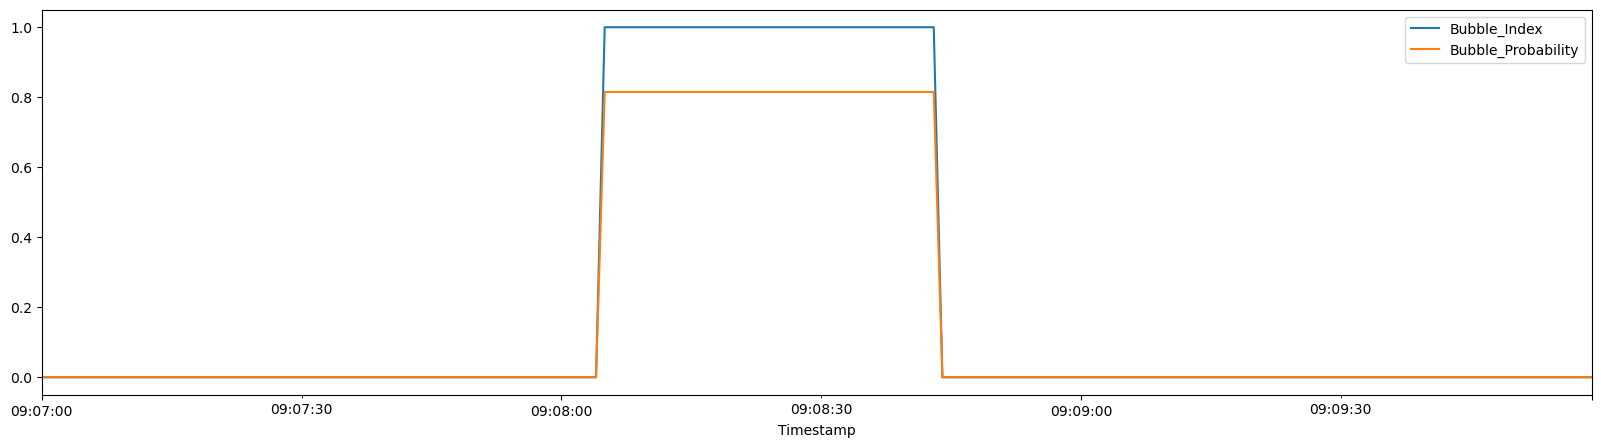

In [8]:
df.plot(y=["Bubble_Index", "Bubble_Probability"], figsize=(20,5));

In [9]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:             (Timestamp: 180)
Coordinates:
  * Timestamp           (Timestamp) datetime64[ns] 2016-01-01T09:07:00 ... 20...
Data variables:
    Spacecraft          (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Bubble_Probability  (Timestamp) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Radius              (Timestamp) float64 6.83e+06 6.83e+06 ... 6.831e+06
    Flags_q             (Timestamp) uint8 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5
    Latitude            (Timestamp) float64 -16.92 -16.99 ... -28.31 -28.38
    Flags_F             (Timestamp) uint8 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    Flags_B             (Timestamp) uint8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    Flags_Bubble        (Timestamp) uint8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    Bubble_Index        (Timestamp) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    Longitude           (Timestamp) float64 -52.12 -52.12 ... -52.24 -52.24
Attributes:
    Sources:         ['SW_OPER_IBIATMS_2F_20160101T000000_20160101T235959_0401']
    MagneticModels:  []
    AppliedFilters:  []